<a href="https://colab.research.google.com/github/MIA-khm/basemodel/blob/master/0.%20Tutorial/AI_intro/Day8_Practice_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# function

In [1]:
"""
import sys, os
import numpy as np

def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad

def sigmoid(x):
  return 1 / (1 + np.exp(-x)) 

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
"""

'\nimport sys, os\nimport numpy as np\n\ndef numerical_gradient(f,x):\n  h = 1e-4\n  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성\n\n  for idx in range(x.size):\n    tmp_val = x[idx]\n    # f(x+h) 계산\n    x[idx] = tmp_val + h\n    fxh1 = f(x)\n\n    # f(x-h) 계산\n    x[idx] = tmp_val - h\n    fxh2 = f(x)\n\n    grad[idx] = (fxh1 - fxh2) / (2*h)\n    x[idx] = tmp_val # 값 복원\n\n  return grad\n\ndef sigmoid(x):\n  return 1 / (1 + np.exp(-x)) \n\ndef softmax(x):\n    if x.ndim == 2:\n        x = x.T\n        x = x - np.max(x, axis=0)\n        y = np.exp(x) / np.sum(np.exp(x), axis=0)\n        return y.T \n\n    x = x - np.max(x) # 오버플로 대책\n    return np.exp(x) / np.sum(np.exp(x))\n\n\ndef cross_entropy_error(y, t):\n    if y.ndim == 1:\n        t = t.reshape(1, t.size)\n        y = y.reshape(1, y.size)\n        \n    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환\n    if t.size == y.size:\n        t = t.argmax(axis=1)\n             \n    batch_size = y.shape[0]\n    return -np.sum(np.log(y[np.arange(batc

# twolayernet

In [2]:
"""
from function import *

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
"""

"\nfrom function import *\n\nclass TwoLayerNet:\n\n    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):\n        # 가중치 초기화\n        self.params = {}\n        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)\n        self.params['b1'] = np.zeros(hidden_size)\n        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)\n        self.params['b2'] = np.zeros(output_size)\n\n    def predict(self, x):\n        W1, W2 = self.params['W1'], self.params['W2']\n        b1, b2 = self.params['b1'], self.params['b2']\n    \n        a1 = np.dot(x, W1) + b1\n        z1 = sigmoid(a1)\n        a2 = np.dot(z1, W2) + b2\n        y = softmax(a2)\n        \n        return y\n        \n    # x : 입력 데이터, t : 정답 레이블\n    def loss(self, x, t):\n        y = self.predict(x)\n        \n        return cross_entropy_error(y, t)\n    \n    def accuracy(self, x, t):\n        y = self.predict(x)\n        y = np.argmax(y, axis=1)\n 

# Training

In [3]:
from keras.datasets import mnist
from twolayernet import TwoLayerNet
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [5]:
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

In [6]:
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size=10)

In [7]:
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

In [8]:
input_size = x_train.shape[1] * x_train.shape[2]
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

In [9]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.1178, 0.1183


/content/function.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


train acc, test acc | 0.8603833333333334, 0.8643
train acc, test acc | 0.8647333333333334, 0.8659
train acc, test acc | 0.86185, 0.8676
train acc, test acc | 0.8555166666666667, 0.8591
train acc, test acc | 0.8752, 0.8814
train acc, test acc | 0.8603833333333334, 0.8647
train acc, test acc | 0.87295, 0.8741
train acc, test acc | 0.8519666666666666, 0.8558
train acc, test acc | 0.8560333333333333, 0.8591
train acc, test acc | 0.87785, 0.8784
train acc, test acc | 0.8587, 0.8617
train acc, test acc | 0.8544, 0.8543
train acc, test acc | 0.85145, 0.8535
train acc, test acc | 0.87665, 0.8809
train acc, test acc | 0.8647666666666667, 0.8637
train acc, test acc | 0.8643166666666666, 0.8666


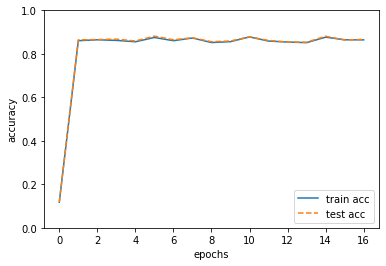

In [10]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()